In [68]:
import logging
logging.basicConfig(filename="26AprInfo.log", level=logging.INFO, format="%(asctime)s %(name)s %(message)s")

In [69]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [70]:
# load dataset
df=pd.read_csv("wine.data")
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [71]:
# with open('wine.names', 'r') as f:
#     column_names = [line.strip() for line in f.readlines()]
# Alcohol
# 2) Malic acid
# 3) Ash
# 4) Alcalinity of ash
# 5) Magnesium
# 6) Total phenols
# 7) Flavanoids
# 8) Nonflavanoid phenols
# 9) Proanthocyanins
# 10)Color intensity
# 11)Hue
# 12)OD280/OD315 of diluted wines
# 13)Proline

In [72]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [73]:
df.rename(columns = {'1':'class identifier', '14.23':'Alcohol', '1.71':'Malic acid', '2.43':'Ash', '15.6':'Alcalinity of ash',
                     '127':'Magnesium', '2.8':'Total phenols', '3.06':'Flavanoids', '.28':'Nonflavanoid phenols',
       '2.29':'Proanthocyanins', '5.64':'Color intensity', '1.04':'Hue', '3.92':'OD280/OD315 of diluted wines', '1065':'Proline'}, 
       inplace = True)

In [74]:
# features and target variables
df.nunique()
# 1-> target 

class identifier                  3
Alcohol                         125
Malic acid                      133
Ash                              78
Alcalinity of ash                62
Magnesium                        52
Total phenols                    97
Flavanoids                      131
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 131
Hue                              78
OD280/OD315 of diluted wines    121
Proline                         121
dtype: int64

In [75]:
df.isnull().sum()

class identifier                0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [76]:
# no missing values/missing value, no imputation required
# target variable
df['class identifier'].unique()

array([1, 2, 3])

In [77]:
df['class identifier'].value_counts()

2    71
1    58
3    48
Name: class identifier, dtype: int64

<Axes: >

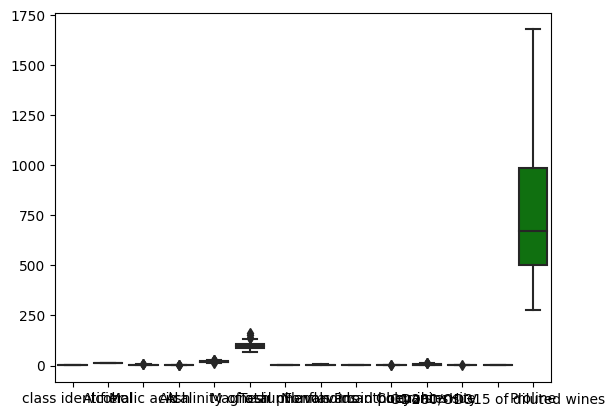

In [78]:
sns.boxplot(df,color='green')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class identifier              177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [80]:
# all int and float data types
# scaling, normalisation
df.describe()

,class identifier,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

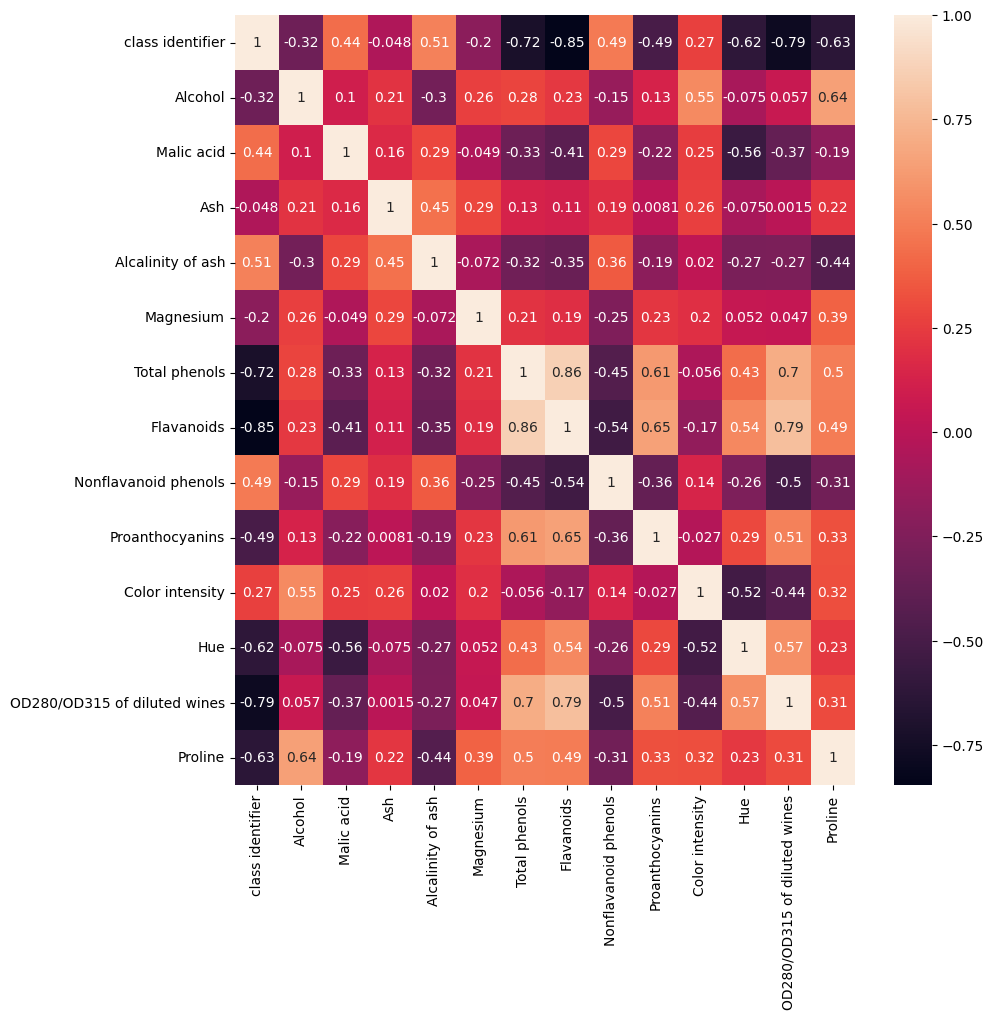

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [82]:
# selecting features and target variables
X=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [83]:
# perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# dimension reduction/ PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [85]:
# Calculate the explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print(cumulative_explained_variance)

# Determine the number of principal components needed to explain at least 90% of the variance
num_components = np.argmax(cumulative_explained_variance >= 0.90)+1
print(num_components)

[0.35983071 0.1924128  0.1117946  0.07111109 0.06628744 0.04960367
 0.04246014 0.02697991 0.02224462 0.01898528 0.01734155 0.01295206
 0.00799613]
[0.35983071 0.5522435  0.6640381  0.73514919 0.80143663 0.8510403
 0.89350044 0.92048035 0.94272497 0.96171025 0.9790518  0.99200387
 1.        ]
8


we require 8 components/features to explain the 90% variance in the dataset.

In [86]:
tmp=df.iloc[:,0:1].values

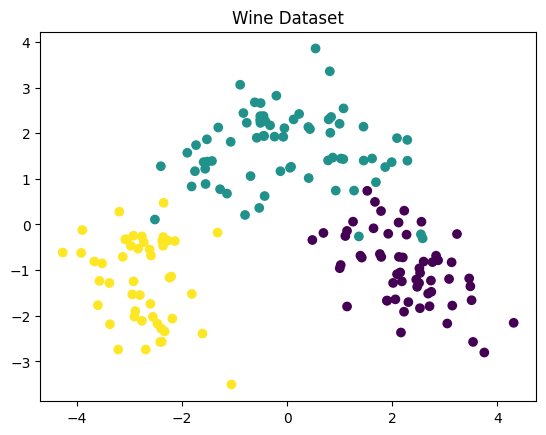

In [87]:
# visualisations
#  X_pca is the PCA-transformed dataset with shape (n_samples, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tmp, cmap='viridis')
plt.title('Wine Dataset')
plt.show()

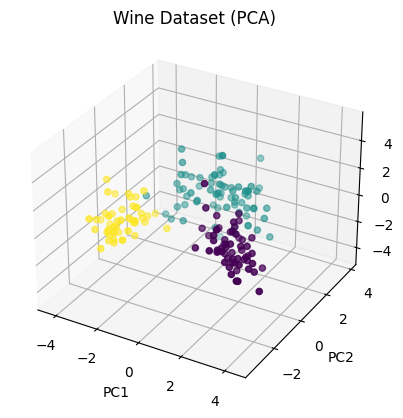

In [88]:
from mpl_toolkits import mplot3d

#  X_pca is the PCA-transformed dataset with shape (n_samples, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=tmp, cmap='viridis')
ax.set_title('Wine Dataset (PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [89]:
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca[:, :num_components])
y_kmeans = kmeans.predict(X_pca[:, :num_components])
silhouette_avg = silhouette_score(X_pca[:, :num_components], y_kmeans)

# print performance metrics for the clustering algorithm
print(f"Number of Clusters: {kmeans.n_clusters}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

Number of Clusters: 3
Silhouette Score: 0.313


Summary Report:

The wine dataset was downloaded from the UCI Machine Learning Repository and loaded into a Pandas dataframe. The dataset was split into features and target variables, and data preprocessing was performed as necessary, including scaling and normalization.

PCA was implemented on the preprocessed dataset using the scikit-learn library. The optimal number of principal components to retain was determined based on the explained variance ratio, resulting in a value of 8 (for a 90% variance).

The results of PCA were visualized using a scatter plot, which showed the distribution of the data in a two-dimensional space that captured the most important variation in the original dataset.
A 3d plot with the top 3 pcs features was also drawn in a three-dimensional space that captured the most important variation in the original dataset.

Clustering analysis was performed on the PCA-transformed data using the K-Means clustering algorithm. The silhouette score was calculated to evaluate the quality of the clustering, resulting in a value of 0.313(3 cluters).

Based on the results of PCA and clustering analysis, it was observed that the wine dataset could be effectively reduced to a lower-dimensional space using PCA, and that K-Means clustering was able to identify distinct clusters within the transformed data. These insights could be useful for further analysis and understanding of the wine dataset.